In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

C:\Users\Scientist_Darren\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('weight-height.csv')
x = df.iloc[:,2:3]
y = df.iloc[:,1:2]
n = len(x)

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
target = min_max_scaler.fit_transform(y)

In [4]:
X = np.c_[np.ones(n), x_scaled]
X

array([[1.        , 0.863139  ],
       [1.        , 0.4754764 ],
       [1.        , 0.72113127],
       ...,
       [1.        , 0.31065968],
       [1.        , 0.48298768],
       [1.        , 0.23843869]])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.3)

In [26]:
# Design Matrix
def design_matrix(x):
    n = len(x)
    X = np.c_[np.ones(n), x]
    return (X)

X_train = design_matrix(x_train)
X_test = design_matrix(x_test)

In [27]:
wu = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
wu

array([[0.05623484],
       [0.91828234]])

In [28]:
u11 = wu[0] + wu[1]*x_train

In [29]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [30]:
def sigmoid_dev(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [31]:
O11 = sigmoid(u11)
O11

array([[0.60005527],
       [0.58206288],
       [0.66290861],
       ...,
       [0.65970627],
       [0.60335818],
       [0.60114493]])

In [21]:
w2 =  np.linalg.inv(X_test.T.dot(X_test)).dot(X_test.T).dot(y_test)
w2

array([[0.05540155],
       [0.9227831 ]])

In [22]:
u21 = w2[1]*O11
u21

array([[0.55372086],
       [0.53711779],
       [0.61172086],
       ...,
       [0.60876579],
       [0.55676873],
       [0.55472638]])

In [43]:
def derivative_wu0(x_train, y_train, y_hat, n):
    return (-1/n) * sum(y_train - y_hat)

In [44]:
def derivative_wu1(x_train, y_train, y_hat, n):
    return (-1/n)*sum((y_train - y_hat)*x_train)

In [47]:
bias = np.random.rand(1)
Epochs = 1000
lr = 0.001

for i in range(Epochs):
    y_hat = u21
    wu_0 = wu[0] - lr*derivative_wu0(x_train,y_train,y_hat,n)
    wu_1 = wu[1] - lr*derivative_wu1(x_train,y_train, y_hat, n)
    
print(wu[0])
print(wu[1])

[0.05623484]
[0.91828234]


In [58]:
def y_hat(x_test, wu, w2):
    return((w2[1]/(1 + np.exp(-wu[0]-wu[1]*x_test)))*(w2[1]/(1+np.exp(-wu[0]-wu[1]*x_test))))

dsv = y_hat(x_test, wu, w2)

In [61]:
epochs = 500
lr = 0.001
y_pred = sigmoid(X_test)
cost_f = []
weights = []

def model(y_true, y_pred,z,x,epochs, dsv, lr):
    sig = 0
    for i in range(epochs):
        y_true = y_true.reshape(len(y_true), 1)
        sig = -np.sum((y_hat*np.exp(z) + (1-y_hat)*np.exp(1 - z)))
        cost.append(sig)
        
        z = z - (lr*(1/n)*sum(y_pred - y_hat))
        
    return (cost, weights)

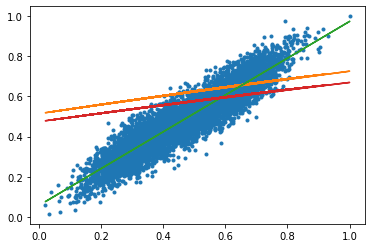

In [73]:
plt.plot(x_train, y_train, '.')
plt.plot(x_train,O11)
plt.plot(x_train, u11)
plt.plot(x_train, u21)
plt.show()